In [15]:
os.chdir('/Users/layne/Desktop/pydatasci')

NameError: name 'os' is not defined

In [16]:
import sys, os, io

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [68]:
import pandas as pd

In [18]:
Store the variance of each feature with the dataset? in general and by class?
Store the 

PCA?
Dist? by class?
Skew?

SyntaxError: invalid syntax (<ipython-input-18-836732ab9d22>, line 2)

In [25]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [26]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [27]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

---

# Features

In [28]:
import plotly.express as px

In [29]:
df = px.data.iris()
features = ["sepal_width", "sepal_length", "petal_width", "petal_length"]

fig = px.scatter_matrix(
    df,
    dimensions=features,
    color="species"
)
fig.update_traces(diagonal_visible=False)
fig.show()

---

# Feature Importance

In [30]:
# Create decision tree classifer object
clf = RandomForestClassifier(random_state=0, n_jobs=10)

# Train model
model = clf.fit(X, y)

In [31]:
importances = model.feature_importances_

In [32]:
model.feature_importances_

array([0.09090795, 0.02453104, 0.46044474, 0.42411627])

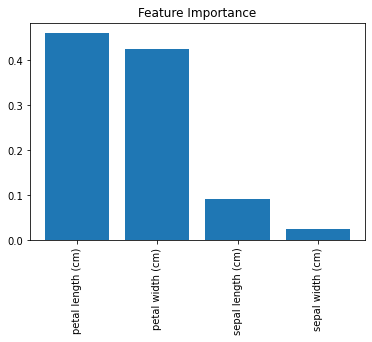

In [33]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [iris.feature_names[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()

---

# PCA & Variance

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [34]:
from sklearn.decomposition import PCA

In [35]:
import numpy as np

In [36]:
num_features = X.shape[1]

In [37]:
pca = PCA(n_components=num_features)
pca.fit(X)

PCA(n_components=4)

In [45]:
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

Text(0, 0.5, 'cumulative explained variance')

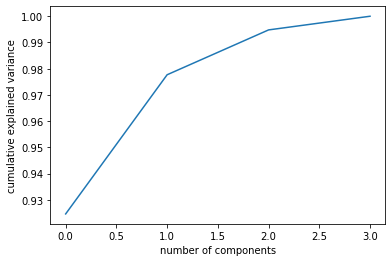

In [46]:
plt.plot(exp_var_cumul)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [47]:
px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

In [48]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [49]:
pca.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [50]:
pca.noise_variance_

0.0

In [71]:
components = pca.components_

In [74]:
components_df = pd.DataFrame(components)

In [75]:
components_df

,0,1,2,3
0,0.361387,-0.084523,0.856671,0.358289
1,0.656589,0.730161,-0.173373,-0.075481
2,-0.582030,0.597911,0.076236,0.545831
3,-0.315487,0.319723,0.479839,-0.753657


In [86]:
for c in components_df:
    new_col = abs(components[c])
    components_df[c] = new_col

In [92]:
list(df.columns[:4])

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [89]:
components_df.sum(axis=0)

0    1.660869
1    1.063538
2    1.652111
3    1.733259
dtype: float64

Does pca vary if you give it a select number of features?

In [108]:
X2 = X[:, [0, 1]]
pca2 = PCA(n_components=2)
pca2.fit(X2)

PCA(n_components=2)

In [109]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [110]:
pca2.explained_variance_ratio_

array([0.78716571, 0.21283429])

---

# Skew

What is i took the skew of the left 2 quartiles and the right two quartiles?

In [55]:
df.skew()

sepal_length    0.314911
sepal_width     0.334053
petal_length   -0.274464
petal_width    -0.104997
species_id      0.000000
dtype: float64

In [64]:
cols = list(df.columns)

In [66]:
cols

['sepal_length',
 'sepal_width',
 'petal_length',
 'petal_width',
 'species',
 'species_id']

ValueError: hist method requires numerical columns, nothing to plot.

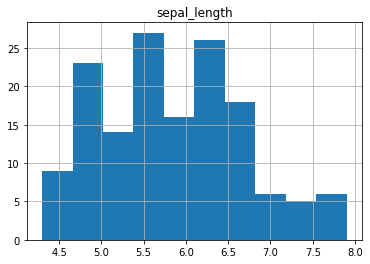

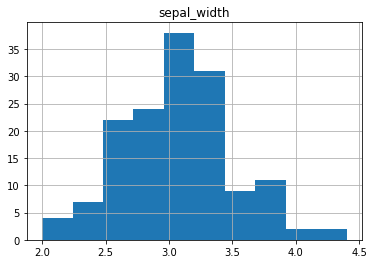

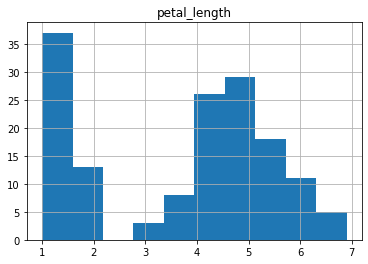

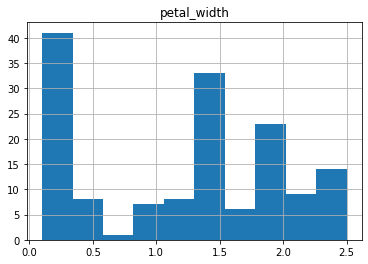

In [65]:
for c in cols:
    df.hist(c)